In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier,StackingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import sklearn

In [4]:
data = sklearn.datasets.load_breast_cancer()

In [30]:
X = pd.DataFrame(data.data,columns=data.feature_names)
y = pd.Series(data.target,name="target")
y = pd.DataFrame(y)

In [31]:
X.shape

(569, 30)

In [32]:
y.shape

(569, 1)

In [33]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [34]:
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [42]:
y['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=24)

In [53]:
rf = RandomForestClassifier(n_estimators=100,random_state=42)
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()

In [54]:
voting = VotingClassifier(estimators=[('knn',knn),('dtc',dtc),('rf',rf)],voting='hard')

In [56]:
voting.fit(X_train,y_train)

C:\Users\tejas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\tejas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('dtc', DecisionTreeClassifier()),
                             ('rf', RandomForestClassifier(random_state=42))])

In [57]:
voting_preds = voting.predict(X_test)

In [59]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [60]:
accuracy_score(voting_preds,y_test)

0.956140350877193

In [61]:
print(classification_report(voting_preds,y_test))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



<Axes: >

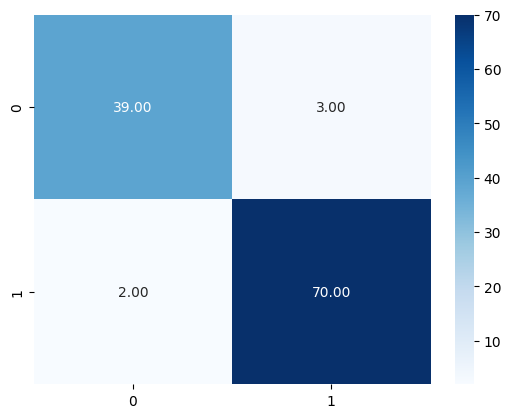

In [66]:
sns.heatmap(confusion_matrix(voting_preds,y_test),annot=True,fmt='.2f',cmap='Blues')

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
stacking = StackingClassifier(estimators=[('knn',knn),('dtc',dtc),('rf',rf)],final_estimator=LogisticRegression())

In [69]:
stacking.fit(X_train,y_train)

C:\Users\tejas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\tejas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


StackingClassifier(estimators=[('knn', KNeighborsClassifier()),
                               ('dtc', DecisionTreeClassifier()),
                               ('rf', RandomForestClassifier(random_state=42))],
                   final_estimator=LogisticRegression())

In [70]:
stacking_preds = stacking.predict(X_test)

In [71]:
accuracy_score(stacking_preds,y_test)

0.956140350877193

In [72]:
print(classification_report(stacking_preds,y_test))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



<Axes: >

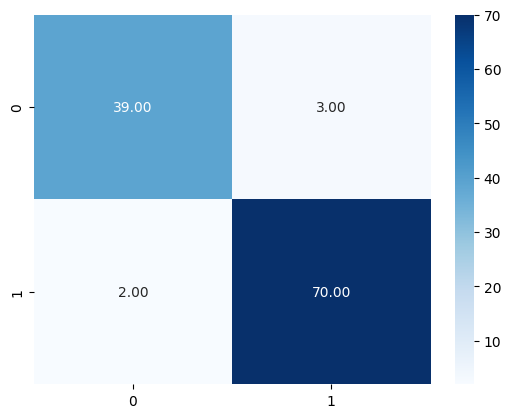

In [73]:
sns.heatmap(confusion_matrix(stacking_preds,y_test),annot=True,fmt='.2f',cmap='Blues')

In [74]:
gb = GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,random_state=42)
ada = AdaBoostClassifier(n_estimators=50,learning_rate=0.1,random_state=42)
xgb = XGBClassifier(n_estimators=100,learning_rate=0.1,random_state=42)

In [75]:
gb.fit(X_train,y_train)

C:\Users\tejas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(random_state=42)

In [76]:
ada.fit(X_train,y_train)

C:\Users\tejas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(learning_rate=0.1, random_state=42)

In [77]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [81]:
gb_preds = gb.predict(X_test)
ada_preds = ada.predict(X_test)
xgb_preds = xgb.predict(X_test)

In [82]:
print(f"Gradient Boost Accuracy: {accuracy_score(gb_preds,y_test)}")
print(f"ADA Boost Accuracy: {accuracy_score(ada_preds,y_test)}")
print(f"XG Boost Accuracy: {accuracy_score(xgb_preds,y_test)}")

Gradient Boost Accuracy: 0.956140350877193
ADA Boost Accuracy: 0.956140350877193
XG Boost Accuracy: 0.9736842105263158


In [85]:
print(f"Gradient Boost\n {classification_report(gb_preds,y_test)}")
print(f"ADA Boost\n {classification_report(ada_preds,y_test)}")
print(f"XG Boost\n {classification_report(xgb_preds,y_test)}")

Gradient Boost
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        40
           1       0.97      0.96      0.97        74

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

ADA Boost
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        40
           1       0.97      0.96      0.97        74

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

XG Boost
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        42
           1       0.97      0.99      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97    

Text(0.5, 1.0, 'Confusion matrix for Gradient Boost')

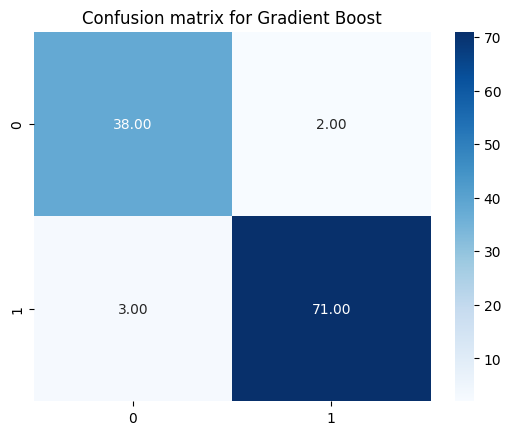

In [90]:
sns.heatmap(confusion_matrix(gb_preds,y_test),annot=True,fmt='.2f',cmap='Blues')
plt.title("Confusion matrix for Gradient Boost")

Text(0.5, 1.0, 'Confusion matrix for ADA Boost')

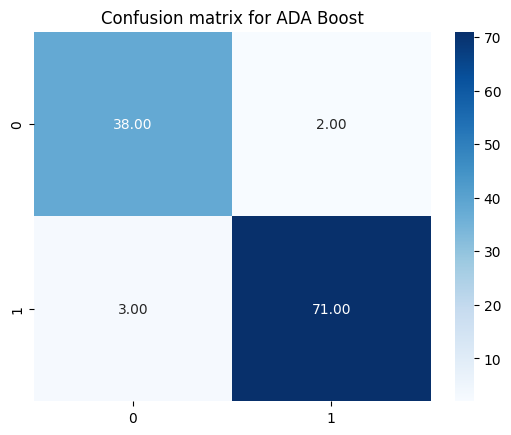

In [91]:
sns.heatmap(confusion_matrix(ada_preds,y_test),annot=True,fmt='.2f',cmap='Blues')
plt.title("Confusion matrix for ADA Boost")

Text(0.5, 1.0, 'Confusion matrix for XG Boost')

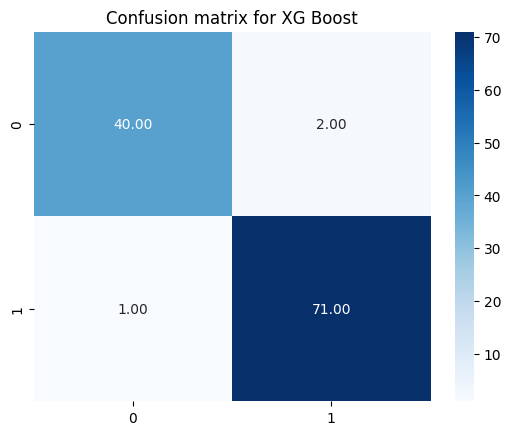

In [92]:
sns.heatmap(confusion_matrix(xgb_preds,y_test),annot=True,fmt='.2f',cmap='Blues')
plt.title("Confusion matrix for XG Boost")